<a href="https://colab.research.google.com/github/Mehul6112/Data-Science_curve/blob/main/LogisticRegression_ML_cheatsheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Cheatsheet with Scikit-Learn

## Introduction

Welcome to the Machine Learning Cheatsheet! In this notebook, we'll cover some fundamental concepts and code snippets using the Scikit-Learn library for machine learning tasks.

## Importing Libraries


In [1]:
#Let's start by importing the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data
Next, we'll load our dataset into a pandas DataFrame. Replace 'dataset.csv' with the path to your dataset file.

In [2]:
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

The digits variable is a dictionary-like object that contains the following attributes:

* data: A NumPy array of shape (n_samples, n_features) containing the data points (images of handwritten digits) represented as flattened arrays of pixel intensities.
* target: A NumPy array of shape (n_samples,) containing the corresponding labels (0-9) for each data point.
* images: A NumPy array of shape (n_samples, 8, 8) containing the data points as 8x8 grayscale images.
* DESCR: A string containing a description of the dataset.

## Data Exploration
Before diving into modeling, let's explore the dataset to understand its structure and characteristics.

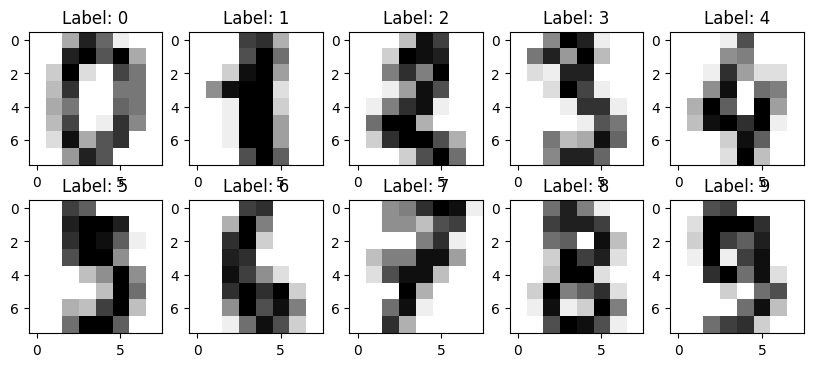

In [3]:
# Visualize the first few images and their labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {label}")
plt.show()

## Training and Testing

In [4]:
# Prepare data
X = digits.data
y = digits.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

digit_model = linear_model.LogisticRegression()
digit_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
# Calculate accuracy
y_pred = digit_model.predict(X_test)
digit_model.score(X_test, y_test)


0.9629629629629629

## Generate confusion matrix and classification report

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  1,  0],
       [ 0,  0,  1,  0,  1, 51,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 52,  0,  0],
       [ 0,  2,  0,  2,  1,  1,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  2, 54]])

Text(95.72222222222221, 0.5, 'Truth')

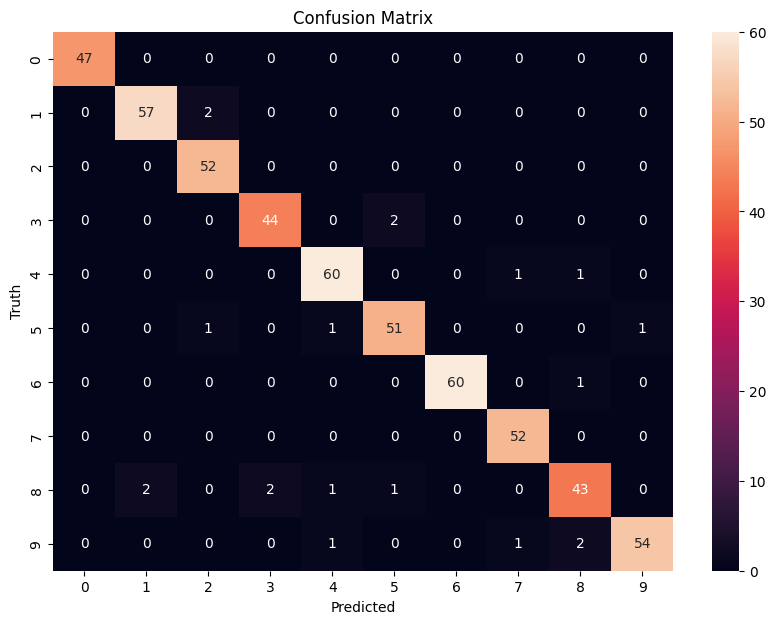

In [7]:
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [8]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      0.97      0.97        59
           2       0.95      1.00      0.97        52
           3       0.96      0.96      0.96        46
           4       0.95      0.97      0.96        62
           5       0.94      0.94      0.94        54
           6       1.00      0.98      0.99        61
           7       0.96      1.00      0.98        52
           8       0.91      0.88      0.90        49
           9       0.98      0.93      0.96        58

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



## Now let's work with a kaggle dataset and perform pre-processing & visualisations along with some machine learning integration as well.


In [9]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 26.6MB/s]


In [10]:
df = pd.read_csv("titanic-dataset.zip")

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Columns like "Name", "Cabin", "Embarked" & "Ticket" dont tell any relevant stuff so its better to just drop these columns.
df = df.drop(columns = ["Name", "Cabin", "Embarked", "Ticket"])
df.Age.isna().sum()

177

In [14]:
df.Age = df.Age.interpolate()

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df[["Age", "Fare", "Survived"]].corr()

,Age,Fare,Survived
Age,1.000000,0.087119,-0.062164
Fare,0.087119,1.000000,0.257307
Survived,-0.062164,0.257307,1.000000


In [17]:
print("The total number of Siblings and spouses onboard the titanic were:", df.SibSp.sum())
print("The total number of Parents and children onboard the titanic were:", df.Parch.sum())


The total number of Siblings and spouses onboard the titanic were: 466
The total number of Parents and children onboard the titanic were: 340


let's create a new field that tell us the age group of passengers.

In [18]:
bins = [0, 6, 18, 30, 60, 81]
labels = ["Children", "Teenagers", "Young_Adults", "Middle_Aged", "Old"]

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

Let's visualis how many people survived the Titanic.

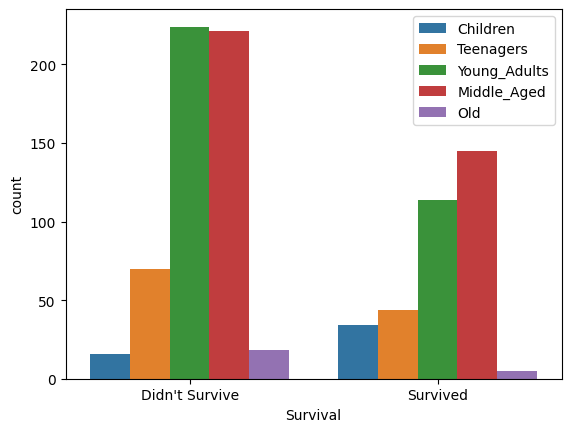

In [19]:
sns.countplot(x = "Survived", data = df, hue = "age_group")
plt.xticks([0, 1], ["Didn't Survive", "Survived"])
plt.xlabel("Survival")
plt.legend(loc = "best")

Let's create two more df based on survival.

In [20]:
surv_df = df[df.Survived == 1]
nosurv_df = df[df.Survived == 0]

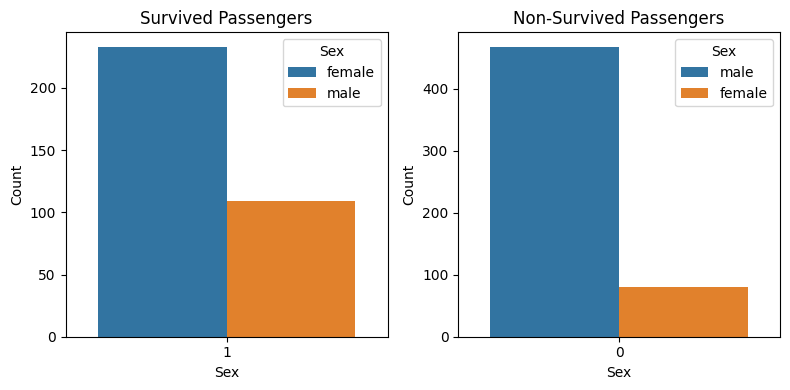

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Countplot for survived passengers (surv_df)
sns.countplot(hue="Sex", x="Survived", data=surv_df, ax=axes[0])
axes[0].set_title("Survived Passengers")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")
# Countplot for non-survived passengers (nosurv_df)
sns.countplot(hue="Sex", x="Survived", data=nosurv_df, ax=axes[1])
axes[1].set_title("Non-Survived Passengers")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_group
0,1,0,3,male,22.0,1,0,7.2500,Young_Adults
1,2,1,1,female,38.0,1,0,71.2833,Middle_Aged
2,3,1,3,female,26.0,0,0,7.9250,Young_Adults
3,4,1,1,female,35.0,1,0,53.1000,Middle_Aged
4,5,0,3,male,35.0,0,0,8.0500,Middle_Aged


In [35]:
le_sex = LabelEncoder()
le_age = LabelEncoder()
df["sex_n"] = le_sex.fit_transform(df.Sex)
df["age_n"] = le_age.fit_transform(df.age_group)
titanic_model = tree.DecisionTreeClassifier()
X = df[["Pclass", "sex_n", "age_n", "Fare"]]
target = df["Survived"]
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
titanic_model.fit(X_train, target_train)
titanic_model.score(X_test, target_test)

0.7947761194029851

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age_group,sex_n,age_n
0,1,0,3,male,22.0,1,0,7.2500,Young_Adults,1,4
1,2,1,1,female,38.0,1,0,71.2833,Middle_Aged,0,1
2,3,1,3,female,26.0,0,0,7.9250,Young_Adults,0,4
3,4,1,1,female,35.0,1,0,53.1000,Middle_Aged,0,1
4,5,0,3,male,35.0,0,0,8.0500,Middle_Aged,1,1


In [39]:
titanic_model.predict([[1,0,1,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])